In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données

## 1. Importation des données avec pandas

In [2]:
df = pd.read_csv("datas/dataset.csv")

## 2. Type et structure des colonnes

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Analyse exploratoire des données

## 1. Comprendre la structure générale du jeu de données

### a. Dimensions

In [5]:
df.shape

(768, 9)

- Nombre de colonnes : 9
- Nombre de Lignes : 768

### b. Type

In [6]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

### c. Aperçu

In [7]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


## 2. Identifier les valeurs manquantes et les doublons

### a. Valeur manquante

In [8]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Il n'y a aucune valeur manquante

### b. Doublons

In [9]:
df.columns.duplicated().sum()

np.int64(0)

Il n'y a aucun doublons

### c. Suppression de la colonne 'Unnameed'

In [10]:
df.drop(columns={'Unnamed: 0'}, axis=1, inplace=True)

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### 3. Analyser la distribution des variables numériques

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


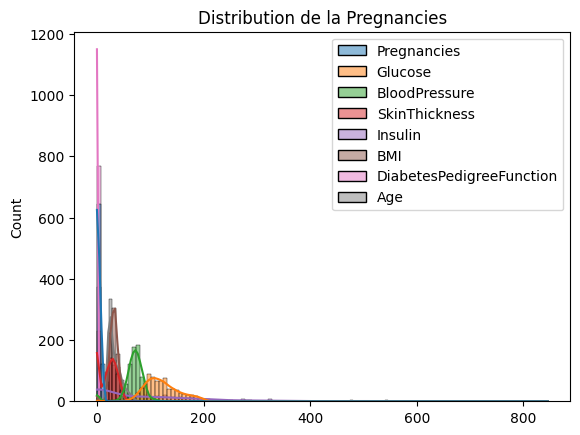

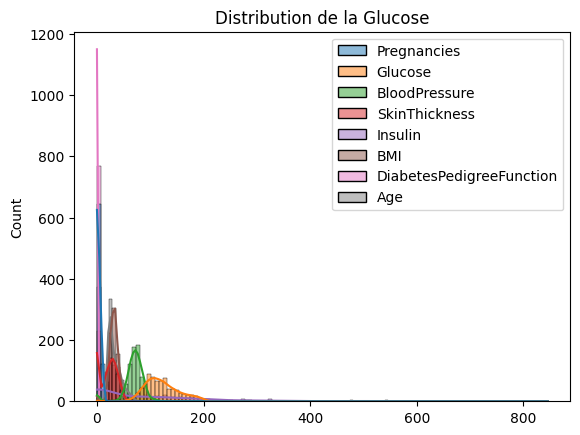

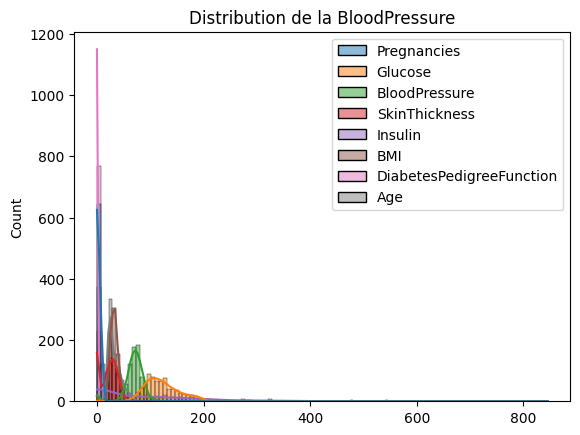

In [ ]:
for i in df.select_dtypes(include = "number").columns.tolist():
    sns.histplot(df, kde=True)
    plt.title(f"Distribution de la {i}")
    plt.show()

### 4. Etude des relations entre les variables

### a. Matrice de corrélation

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation entre les variables numérique")
plt.show()

# Prétraitement des données

### 1. Gestion des valeurs manquantes

Vue qu'il n'y a pas de valeurs manquantes on a pas besoin de les traiter

### 2. Détéction et suppression des valeurs aberrante

### 2.1 Détection des valeurs aberrantes

### a. Methode des interquarties

In [ ]:
def outliers(dframe):
    outliers = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        outliers = dframe[(dframe[i] < b_inf) | (dframe[i] > b_sup)]
    return outliers
outliers = outliers(df)
outliers

### b. Mehode boite à moustache 

In [ ]:
for i in df.select_dtypes(include="number").columns.tolist():
    sns.boxplot(x=df[i])
    plt.title(f"Boite à moustache avant suppression des outliers de {i}")
    plt.show()

### 2.2 Suppression des valeurs aberrantes

In [ ]:
def remove_outliers(dframe):
    df_clean = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        df_clean = dframe[(dframe[i] >= b_inf) & (dframe[i] <= b_sup)]
        
    return df_clean

df_clean=remove_outliers(df)
df_clean


In [ ]:
for i in df_clean.select_dtypes(include="number").columns.tolist():
    sns.boxplot(x=df_clean[i])
    plt.title(f"Boite à moustache aprés suppression des outliers de {i}")
    plt.show()

In [ ]:
df_clean.shape

### 3. Analyse exploratoire des relations entre variables

Choix des colonnes jugées significatives: Glucose, BMI, Age, DiabetesPedigreeFunction.

In [ ]:
cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
sns.pairplot(df_clean[cols])
plt.show()

### 4. Mise à l’échelle des variables grace à la technique de centrage-réduction(StandardScaler)

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_clean